In [1]:
import kwant
import semicon

import numpy as np
import scipy.linalg as la
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

# Peierl's substitution

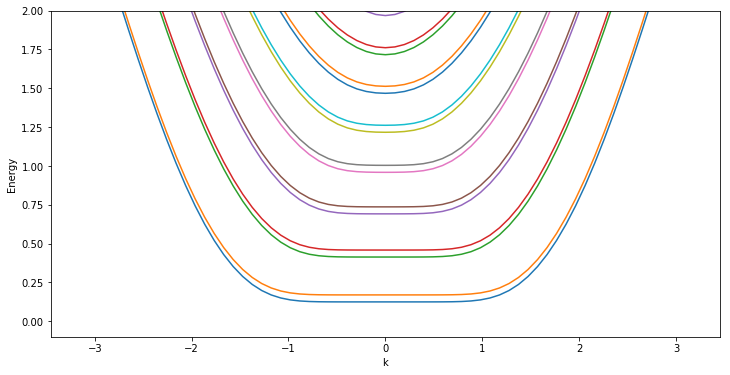

In [2]:
# Define model and system

hamiltonian = '(k_x**2 + k_y**2) * sigma_0 + g * B_z * sigma_z'
vector_potential = '[-B_z * y, 0, 0]'

shape = lambda site: -10 <= site.pos[1] <= 10


# We cannot make use of ``kwant.continuum.discretize`` because we need
# to alter output of symbolic discretization in order to include 
# Peierl's substitution

tb_ham, coords = kwant.continuum.discretize_symbolic(hamiltonian, 'xy')
tb_ham = semicon.peierls.apply(tb_ham, coords, A=vector_potential)
template = kwant.continuum.build_discretized(tb_ham, coords)


# Build the system in standard and usual way

syst = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
syst.fill(template, shape, (0, 0));
syst = syst.finalized()


# Let's look into the band structure

p = dict(t=1, phi_0=2*np.pi, B_z=.15, exp=np.exp, alpha=.25, g=.15)
kwant.plotter.bands(syst, params=p, show=False, fig_size=(12, 6));
plt.ylim(-.1, 2);

# compare with $ k_i \rightarrow k_i + \frac{e}{h} A_i $

In [3]:
import sympy
sympy.init_printing()

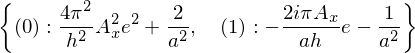

In [4]:
kwant.continuum.discretize_symbolic("(k_x + 2 * pi * (e/h) * A_x)**2")[0]

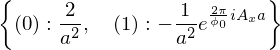

In [5]:
hamiltonian = 'k_x**2'
vector_potential = '[A_x, 0, 0]'

tb_ham, coords = kwant.continuum.discretize_symbolic(hamiltonian, 'x')
tb_ham = semicon.peierls.apply(tb_ham, coords, A=vector_potential)
tb_ham